In [118]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score

будем использовать датасет полученый после KDTree feature extraction

In [15]:
df_train =  pd.read_csv("/Volumes/HP P800/itmo/Lidar data/df_kdtree_train.csv")

In [16]:
df_train.groupby(["label"]).count()

,Unnamed: 0,scene_id,x,y,z,intensity,ring,x_normailized,y_normailized,z_normailized,...,dist_for_first,dist_for_last,ring_mean,ring_std,ring_for_first,ring_for_last,int_mean,int_std,int_for_first,int_for_last
label,,,,,,,,,,,,,,,,,,,,,
0.0,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695,...,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695
1.0,453509,453509,453509,453509,453509,453509,453509,453509,453509,453509,...,453509,453509,453509,453509,453509,453509,453509,453509,453509,453509


балансируем датасет путем раскопирования данных

In [17]:
k = df_train[df_train["label"] == 1.0]

m = len(df_train[df_train["label"] == 0.0]) // len(df_train[df_train["label"] == 1.0])
ost = len(df_train[df_train["label"] == 0.0]) % len(df_train[df_train["label"] == 1.0])

for i in range(0,m-1):
    df_train = df_train.append(k)

df_train = df_train.append(k.head(ost))

/var/folders/bx/60hcl2tn12bb9txf54xp9l9m0000gn/T/ipykernel_1056/155822642.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(k)
/var/folders/bx/60hcl2tn12bb9txf54xp9l9m0000gn/T/ipykernel_1056/155822642.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(k)
/var/folders/bx/60hcl2tn12bb9txf54xp9l9m0000gn/T/ipykernel_1056/155822642.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(k)
/var/folders/bx/60hcl2tn12bb9txf54xp9l9m0000gn/T/ipykernel_1056/155822642.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(k)
/var/folders/bx/60hc

In [18]:
df_train.groupby(["label"]).count()

,Unnamed: 0,scene_id,x,y,z,intensity,ring,x_normailized,y_normailized,z_normailized,...,dist_for_first,dist_for_last,ring_mean,ring_std,ring_for_first,ring_for_last,int_mean,int_std,int_for_first,int_for_last
label,,,,,,,,,,,,,,,,,,,,,
0.0,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695,...,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695
1.0,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695,...,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695,4016695


Выделяем X и y

In [21]:
X_train = df_train.drop(["Unnamed: 0", "scene_id", "x", "y", "z", "label"], axis=1)
y_train = df_train[["label"]]

In [22]:
X_train

,intensity,ring,x_normailized,y_normailized,z_normailized,dist_mean,dist_std,dist_for_first,dist_for_last,ring_mean,ring_std,ring_for_first,ring_for_last,int_mean,int_std,int_for_first,int_for_last
0,0.0,23.0,0.334384,0.428199,0.304751,0.095797,0.017134,0.063558,0.109770,16.666667,7.366591,25.0,10.0,20.333333,22.642144,0.0,48.0
1,0.0,25.0,0.425570,0.466143,0.298890,0.061574,0.011076,0.049237,0.076238,18.500000,4.593474,22.0,25.0,0.833333,1.329160,0.0,0.0
2,0.0,31.0,0.400525,0.463751,0.477613,0.167934,0.004370,0.160898,0.173386,27.833333,1.602082,27.0,31.0,0.000000,0.000000,0.0,0.0
3,0.0,23.0,0.292635,0.475745,0.310748,0.090088,0.013355,0.063558,0.103703,24.000000,1.673320,23.0,26.0,0.000000,0.000000,0.0,0.0
4,0.0,22.0,0.385172,0.493753,0.293417,0.045653,0.005326,0.041669,0.056021,22.333333,3.076795,25.0,25.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737140,0.0,18.0,0.484595,0.402079,0.367750,0.024194,0.002405,0.020453,0.026983,22.000000,1.673320,20.0,24.0,0.000000,0.000000,0.0,0.0
3737141,0.0,26.0,0.468482,0.345784,0.427550,0.017766,0.004920,0.010447,0.024052,26.000000,0.632456,26.0,26.0,0.166667,0.408248,0.0,0.0
3737142,0.0,24.0,0.482812,0.364274,0.402211,0.010062,0.005570,0.003663,0.017446,24.333333,1.032796,26.0,24.0,0.000000,0.000000,0.0,0.0
3737143,0.0,26.0,0.480314,0.378161,0.415181,0.015447,0.004328,0.006281,0.019166,25.166667,0.983192,26.0,25.0,0.000000,0.000000,0.0,0.0


Хочеться использовать небольшую и быструю модельку для решения этой задачи, поэтому запустим небольшой greed search по маленькой сеточке парметров

In [23]:
from catboost import CatBoostClassifier
import numpy as np

model = CatBoostClassifier()

grid = {'learning_rate': [0.5, 1.0],
        'depth': [2, 4, 6],
        'iterations': [50, 100, 150],
       }

grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1891731	test: 0.1890932	best: 0.1890932 (0)	total: 1.01s	remaining: 49.6s
1:	learn: 0.1135431	test: 0.1135103	best: 0.1135103 (1)	total: 1.38s	remaining: 33.1s
2:	learn: 0.0846950	test: 0.0847139	best: 0.0847139 (2)	total: 1.72s	remaining: 26.9s
3:	learn: 0.0767288	test: 0.0766079	best: 0.0766079 (3)	total: 2.03s	remaining: 23.3s
4:	learn: 0.0694061	test: 0.0694092	best: 0.0694092 (4)	total: 2.37s	remaining: 21.4s
5:	learn: 0.0653878	test: 0.0653258	best: 0.0653258 (5)	total: 2.66s	remaining: 19.5s
6:	learn: 0.0604205	test: 0.0603773	best: 0.0603773 (6)	total: 2.97s	remaining: 18.2s
7:	learn: 0.0569682	test: 0.0569362	best: 0.0569362 (7)	total: 3.3s	remaining: 17.3s
8:	learn: 0.0554257	test: 0.0554644	best: 0.0554644 (8)	total: 3.62s	remaining: 16.5s
9:	learn: 0.0531190	test: 0.0531549	best: 0.0531549 (9)	total: 3.95s	remaining: 15.8s
10:	learn: 0.0507458	test: 0.0508000	best: 0.0508000 (10)	total: 4.26s	remaining: 15.1s
11:	learn: 0.0498495	test: 0.0499449	best: 0.0499449 

43:	learn: 0.0354000	test: 0.0355835	best: 0.0355835 (43)	total: 18.4s	remaining: 2.5s
44:	learn: 0.0352600	test: 0.0354338	best: 0.0354338 (44)	total: 18.8s	remaining: 2.08s
45:	learn: 0.0349265	test: 0.0350718	best: 0.0350718 (45)	total: 19.3s	remaining: 1.67s
46:	learn: 0.0347678	test: 0.0348893	best: 0.0348893 (46)	total: 19.7s	remaining: 1.25s
47:	learn: 0.0345262	test: 0.0346286	best: 0.0346286 (47)	total: 20.2s	remaining: 840ms
48:	learn: 0.0344644	test: 0.0345560	best: 0.0345560 (48)	total: 20.6s	remaining: 420ms
49:	learn: 0.0344173	test: 0.0345355	best: 0.0345355 (49)	total: 21s	remaining: 0us

bestTest = 0.03453548071
bestIteration = 49

1:	loss: 0.0345355	best: 0.0345355 (1)	total: 42.9s	remaining: 5m 43s
0:	learn: 0.1891731	test: 0.1890932	best: 0.1890932 (0)	total: 708ms	remaining: 1m 10s
1:	learn: 0.1135431	test: 0.1135103	best: 0.1135103 (1)	total: 1.13s	remaining: 55.4s
2:	learn: 0.0846950	test: 0.0847139	best: 0.0847139 (2)	total: 1.51s	remaining: 49s
3:	learn: 0.0767

86:	learn: 0.0317982	test: 0.0320628	best: 0.0320628 (86)	total: 31.8s	remaining: 4.76s
87:	learn: 0.0316999	test: 0.0319639	best: 0.0319639 (87)	total: 32.2s	remaining: 4.39s
88:	learn: 0.0316395	test: 0.0318980	best: 0.0318980 (88)	total: 32.5s	remaining: 4.02s
89:	learn: 0.0315633	test: 0.0318231	best: 0.0318231 (89)	total: 32.9s	remaining: 3.65s
90:	learn: 0.0315242	test: 0.0317897	best: 0.0317897 (90)	total: 33.2s	remaining: 3.29s
91:	learn: 0.0314751	test: 0.0317403	best: 0.0317403 (91)	total: 33.6s	remaining: 2.92s
92:	learn: 0.0314143	test: 0.0316785	best: 0.0316785 (92)	total: 33.9s	remaining: 2.55s
93:	learn: 0.0313910	test: 0.0316537	best: 0.0316537 (93)	total: 34.3s	remaining: 2.19s
94:	learn: 0.0313636	test: 0.0316213	best: 0.0316213 (94)	total: 34.6s	remaining: 1.82s
95:	learn: 0.0313234	test: 0.0315909	best: 0.0315909 (95)	total: 35s	remaining: 1.46s
96:	learn: 0.0312961	test: 0.0315576	best: 0.0315576 (96)	total: 35.4s	remaining: 1.09s
97:	learn: 0.0312751	test: 0.03153

79:	learn: 0.0315939	test: 0.0317340	best: 0.0317340 (79)	total: 27.3s	remaining: 6.83s
80:	learn: 0.0315328	test: 0.0316756	best: 0.0316756 (80)	total: 27.7s	remaining: 6.49s
81:	learn: 0.0313856	test: 0.0315379	best: 0.0315379 (81)	total: 28.1s	remaining: 6.16s
82:	learn: 0.0312982	test: 0.0314452	best: 0.0314452 (82)	total: 28.4s	remaining: 5.82s
83:	learn: 0.0312556	test: 0.0314074	best: 0.0314074 (83)	total: 28.8s	remaining: 5.49s
84:	learn: 0.0311977	test: 0.0313407	best: 0.0313407 (84)	total: 29.2s	remaining: 5.15s
85:	learn: 0.0311976	test: 0.0313406	best: 0.0313406 (85)	total: 29.5s	remaining: 4.8s
86:	learn: 0.0311975	test: 0.0313405	best: 0.0313405 (86)	total: 29.9s	remaining: 4.46s
87:	learn: 0.0311973	test: 0.0313404	best: 0.0313404 (87)	total: 30.2s	remaining: 4.12s
88:	learn: 0.0311971	test: 0.0313402	best: 0.0313402 (88)	total: 30.6s	remaining: 3.78s
89:	learn: 0.0311971	test: 0.0313402	best: 0.0313402 (88)	total: 31s	remaining: 3.44s
90:	learn: 0.0311971	test: 0.031340

72:	learn: 0.0328729	test: 0.0331680	best: 0.0331680 (72)	total: 33s	remaining: 34.8s
73:	learn: 0.0328017	test: 0.0330898	best: 0.0330898 (73)	total: 33.5s	remaining: 34.4s
74:	learn: 0.0327462	test: 0.0330330	best: 0.0330330 (74)	total: 34s	remaining: 34s
75:	learn: 0.0327276	test: 0.0330162	best: 0.0330162 (75)	total: 34.5s	remaining: 33.6s
76:	learn: 0.0325541	test: 0.0328373	best: 0.0328373 (76)	total: 35s	remaining: 33.2s
77:	learn: 0.0324511	test: 0.0327291	best: 0.0327291 (77)	total: 35.4s	remaining: 32.7s
78:	learn: 0.0323180	test: 0.0325773	best: 0.0325773 (78)	total: 35.9s	remaining: 32.2s
79:	learn: 0.0321763	test: 0.0324303	best: 0.0324303 (79)	total: 36.4s	remaining: 31.8s
80:	learn: 0.0321486	test: 0.0324046	best: 0.0324046 (80)	total: 36.8s	remaining: 31.4s
81:	learn: 0.0321082	test: 0.0323697	best: 0.0323697 (81)	total: 37.3s	remaining: 30.9s
82:	learn: 0.0320561	test: 0.0323233	best: 0.0323233 (82)	total: 37.8s	remaining: 30.5s
83:	learn: 0.0319949	test: 0.0322635	bes

14:	learn: 0.0452192	test: 0.0454619	best: 0.0454619 (14)	total: 6.53s	remaining: 58.7s
15:	learn: 0.0440636	test: 0.0443167	best: 0.0443167 (15)	total: 6.91s	remaining: 57.8s
16:	learn: 0.0435833	test: 0.0438578	best: 0.0438578 (16)	total: 7.29s	remaining: 57.1s
17:	learn: 0.0429148	test: 0.0432353	best: 0.0432353 (17)	total: 7.69s	remaining: 56.4s
18:	learn: 0.0422913	test: 0.0426090	best: 0.0426090 (18)	total: 8.09s	remaining: 55.8s
19:	learn: 0.0414263	test: 0.0417314	best: 0.0417314 (19)	total: 8.5s	remaining: 55.2s
20:	learn: 0.0408217	test: 0.0410562	best: 0.0410562 (20)	total: 8.89s	remaining: 54.6s
21:	learn: 0.0405151	test: 0.0407725	best: 0.0407725 (21)	total: 9.28s	remaining: 54s
22:	learn: 0.0403606	test: 0.0406195	best: 0.0406195 (22)	total: 9.68s	remaining: 53.5s
23:	learn: 0.0398616	test: 0.0400621	best: 0.0400621 (23)	total: 10.1s	remaining: 52.9s
24:	learn: 0.0395893	test: 0.0397957	best: 0.0397957 (24)	total: 10.5s	remaining: 52.3s
25:	learn: 0.0394591	test: 0.039667

108:	learn: 0.0311971	test: 0.0313402	best: 0.0313402 (88)	total: 41.4s	remaining: 15.6s
109:	learn: 0.0311971	test: 0.0313402	best: 0.0313402 (88)	total: 41.8s	remaining: 15.2s
110:	learn: 0.0311971	test: 0.0313402	best: 0.0313402 (88)	total: 42.2s	remaining: 14.8s
111:	learn: 0.0311971	test: 0.0313402	best: 0.0313402 (88)	total: 42.5s	remaining: 14.4s
112:	learn: 0.0311971	test: 0.0313402	best: 0.0313402 (88)	total: 42.8s	remaining: 14s
113:	learn: 0.0311971	test: 0.0313402	best: 0.0313402 (88)	total: 43.2s	remaining: 13.6s
114:	learn: 0.0311971	test: 0.0313402	best: 0.0313402 (88)	total: 43.5s	remaining: 13.2s
115:	learn: 0.0311971	test: 0.0313402	best: 0.0313402 (88)	total: 43.8s	remaining: 12.8s
116:	learn: 0.0311971	test: 0.0313402	best: 0.0313402 (88)	total: 44.2s	remaining: 12.5s
117:	learn: 0.0311971	test: 0.0313402	best: 0.0313402 (88)	total: 44.5s	remaining: 12.1s
118:	learn: 0.0311971	test: 0.0313402	best: 0.0313402 (88)	total: 44.8s	remaining: 11.7s
119:	learn: 0.0311971	t

0:	learn: 0.0907027	test: 0.0904487	best: 0.0904487 (0)	total: 577ms	remaining: 28.3s
1:	learn: 0.0736728	test: 0.0738632	best: 0.0738632 (1)	total: 1.09s	remaining: 26.2s
2:	learn: 0.0608478	test: 0.0610287	best: 0.0610287 (2)	total: 1.6s	remaining: 25.1s
3:	learn: 0.0522290	test: 0.0524359	best: 0.0524359 (3)	total: 2.08s	remaining: 23.9s
4:	learn: 0.0494426	test: 0.0496408	best: 0.0496408 (4)	total: 2.6s	remaining: 23.4s
5:	learn: 0.0468390	test: 0.0470786	best: 0.0470786 (5)	total: 3.1s	remaining: 22.7s
6:	learn: 0.0450926	test: 0.0453593	best: 0.0453593 (6)	total: 3.61s	remaining: 22.2s
7:	learn: 0.0424096	test: 0.0427018	best: 0.0427018 (7)	total: 4.12s	remaining: 21.6s
8:	learn: 0.0413045	test: 0.0416109	best: 0.0416109 (8)	total: 4.6s	remaining: 21s
9:	learn: 0.0398773	test: 0.0400737	best: 0.0400737 (9)	total: 5.08s	remaining: 20.3s
10:	learn: 0.0390892	test: 0.0393097	best: 0.0393097 (10)	total: 5.55s	remaining: 19.7s
11:	learn: 0.0380610	test: 0.0382211	best: 0.0382211 (11)	

43:	learn: 0.0291640	test: 0.0293131	best: 0.0293131 (43)	total: 23.9s	remaining: 30.4s
44:	learn: 0.0289795	test: 0.0291165	best: 0.0291165 (44)	total: 24.5s	remaining: 29.9s
45:	learn: 0.0288791	test: 0.0290297	best: 0.0290297 (45)	total: 25s	remaining: 29.4s
46:	learn: 0.0286672	test: 0.0288267	best: 0.0288267 (46)	total: 25.6s	remaining: 28.9s
47:	learn: 0.0285262	test: 0.0286558	best: 0.0286558 (47)	total: 26.1s	remaining: 28.3s
48:	learn: 0.0284481	test: 0.0285798	best: 0.0285798 (48)	total: 26.7s	remaining: 27.8s
49:	learn: 0.0283927	test: 0.0285297	best: 0.0285297 (49)	total: 27.3s	remaining: 27.3s
50:	learn: 0.0282931	test: 0.0284308	best: 0.0284308 (50)	total: 27.9s	remaining: 26.8s
51:	learn: 0.0282266	test: 0.0283629	best: 0.0283629 (51)	total: 28.5s	remaining: 26.3s
52:	learn: 0.0281059	test: 0.0282411	best: 0.0282411 (52)	total: 29s	remaining: 25.7s
53:	learn: 0.0279842	test: 0.0280912	best: 0.0280912 (53)	total: 29.6s	remaining: 25.2s
54:	learn: 0.0279493	test: 0.0280706

36:	learn: 0.0293502	test: 0.0294906	best: 0.0294906 (36)	total: 17.9s	remaining: 30.4s
37:	learn: 0.0292795	test: 0.0294295	best: 0.0294295 (37)	total: 18.3s	remaining: 29.9s
38:	learn: 0.0289821	test: 0.0290663	best: 0.0290663 (38)	total: 18.8s	remaining: 29.4s
39:	learn: 0.0288927	test: 0.0289871	best: 0.0289871 (39)	total: 19.2s	remaining: 28.9s
40:	learn: 0.0287546	test: 0.0288671	best: 0.0288671 (40)	total: 19.7s	remaining: 28.3s
41:	learn: 0.0286533	test: 0.0287764	best: 0.0287764 (41)	total: 20.2s	remaining: 27.8s
42:	learn: 0.0285387	test: 0.0286609	best: 0.0286609 (42)	total: 20.6s	remaining: 27.3s
43:	learn: 0.0283010	test: 0.0284377	best: 0.0284377 (43)	total: 21.1s	remaining: 26.8s
44:	learn: 0.0281416	test: 0.0282685	best: 0.0282685 (44)	total: 21.5s	remaining: 26.2s
45:	learn: 0.0280660	test: 0.0281604	best: 0.0281604 (45)	total: 21.9s	remaining: 25.7s
46:	learn: 0.0279499	test: 0.0280460	best: 0.0280460 (46)	total: 22.4s	remaining: 25.3s
47:	learn: 0.0278586	test: 0.027

29:	learn: 0.0316816	test: 0.0318902	best: 0.0318902 (29)	total: 15.3s	remaining: 1m 1s
30:	learn: 0.0314314	test: 0.0316561	best: 0.0316561 (30)	total: 15.8s	remaining: 1m
31:	learn: 0.0311943	test: 0.0313978	best: 0.0313978 (31)	total: 16.3s	remaining: 1m
32:	learn: 0.0310474	test: 0.0312482	best: 0.0312482 (32)	total: 16.9s	remaining: 59.7s
33:	learn: 0.0309724	test: 0.0311741	best: 0.0311741 (33)	total: 17.3s	remaining: 58.9s
34:	learn: 0.0307662	test: 0.0309604	best: 0.0309604 (34)	total: 17.8s	remaining: 58.4s
35:	learn: 0.0305455	test: 0.0307330	best: 0.0307330 (35)	total: 18.2s	remaining: 57.7s
36:	learn: 0.0304142	test: 0.0306015	best: 0.0306015 (36)	total: 18.6s	remaining: 56.9s
37:	learn: 0.0302851	test: 0.0304720	best: 0.0304720 (37)	total: 19.1s	remaining: 56.2s
38:	learn: 0.0301363	test: 0.0303230	best: 0.0303230 (38)	total: 19.5s	remaining: 55.5s
39:	learn: 0.0299479	test: 0.0301342	best: 0.0301342 (39)	total: 20s	remaining: 55s
40:	learn: 0.0298124	test: 0.0300021	best:

123:	learn: 0.0239027	test: 0.0240516	best: 0.0240516 (123)	total: 1m	remaining: 12.6s
124:	learn: 0.0239026	test: 0.0240515	best: 0.0240515 (124)	total: 1m	remaining: 12.1s
125:	learn: 0.0239025	test: 0.0240514	best: 0.0240514 (125)	total: 1m 1s	remaining: 11.6s
126:	learn: 0.0239024	test: 0.0240513	best: 0.0240513 (126)	total: 1m 1s	remaining: 11.2s
127:	learn: 0.0239024	test: 0.0240513	best: 0.0240513 (126)	total: 1m 2s	remaining: 10.7s
128:	learn: 0.0239023	test: 0.0240512	best: 0.0240512 (128)	total: 1m 2s	remaining: 10.2s
129:	learn: 0.0239023	test: 0.0240512	best: 0.0240512 (129)	total: 1m 3s	remaining: 9.7s
130:	learn: 0.0239021	test: 0.0240511	best: 0.0240511 (130)	total: 1m 3s	remaining: 9.21s
131:	learn: 0.0239019	test: 0.0240508	best: 0.0240508 (131)	total: 1m 4s	remaining: 8.73s
132:	learn: 0.0239019	test: 0.0240508	best: 0.0240508 (132)	total: 1m 4s	remaining: 8.24s
133:	learn: 0.0239018	test: 0.0240507	best: 0.0240507 (133)	total: 1m 4s	remaining: 7.76s
134:	learn: 0.023

65:	learn: 0.0259670	test: 0.0261448	best: 0.0261448 (65)	total: 34.2s	remaining: 43.5s
66:	learn: 0.0259146	test: 0.0260998	best: 0.0260998 (66)	total: 34.7s	remaining: 43s
67:	learn: 0.0258474	test: 0.0260353	best: 0.0260353 (67)	total: 35.3s	remaining: 42.5s
68:	learn: 0.0258084	test: 0.0259976	best: 0.0259976 (68)	total: 35.7s	remaining: 41.9s
69:	learn: 0.0257688	test: 0.0259769	best: 0.0259769 (69)	total: 36.2s	remaining: 41.4s
70:	learn: 0.0257211	test: 0.0259283	best: 0.0259283 (70)	total: 36.8s	remaining: 40.9s
71:	learn: 0.0256184	test: 0.0258434	best: 0.0258434 (71)	total: 37.4s	remaining: 40.5s
72:	learn: 0.0255861	test: 0.0258084	best: 0.0258084 (72)	total: 38s	remaining: 40.1s
73:	learn: 0.0255494	test: 0.0257744	best: 0.0257744 (73)	total: 38.5s	remaining: 39.6s
74:	learn: 0.0254925	test: 0.0257267	best: 0.0257267 (74)	total: 39s	remaining: 39s
75:	learn: 0.0254670	test: 0.0257038	best: 0.0257038 (75)	total: 39.6s	remaining: 38.6s
76:	learn: 0.0253875	test: 0.0256190	bes

6:	learn: 0.0372385	test: 0.0374782	best: 0.0374782 (6)	total: 4.32s	remaining: 26.5s
7:	learn: 0.0364809	test: 0.0367698	best: 0.0367698 (7)	total: 4.86s	remaining: 25.5s
8:	learn: 0.0355735	test: 0.0358396	best: 0.0358396 (8)	total: 5.45s	remaining: 24.8s
9:	learn: 0.0345907	test: 0.0348360	best: 0.0348360 (9)	total: 6.04s	remaining: 24.1s
10:	learn: 0.0337621	test: 0.0339961	best: 0.0339961 (10)	total: 6.65s	remaining: 23.6s
11:	learn: 0.0330933	test: 0.0333086	best: 0.0333086 (11)	total: 7.25s	remaining: 23s
12:	learn: 0.0325492	test: 0.0327559	best: 0.0327559 (12)	total: 7.88s	remaining: 22.4s
13:	learn: 0.0320003	test: 0.0321902	best: 0.0321902 (13)	total: 8.52s	remaining: 21.9s
14:	learn: 0.0316168	test: 0.0318016	best: 0.0318016 (14)	total: 9.13s	remaining: 21.3s
15:	learn: 0.0311623	test: 0.0313087	best: 0.0313087 (15)	total: 9.72s	remaining: 20.7s
16:	learn: 0.0307843	test: 0.0309447	best: 0.0309447 (16)	total: 10.4s	remaining: 20.1s
17:	learn: 0.0304852	test: 0.0306545	best:

49:	learn: 0.0232198	test: 0.0233638	best: 0.0233638 (49)	total: 35.2s	remaining: 0us

bestTest = 0.02336375355
bestIteration = 49

13:	loss: 0.0233638	best: 0.0223885 (11)	total: 10m 9s	remaining: 2m 54s
0:	learn: 0.1140730	test: 0.1141303	best: 0.1141303 (0)	total: 887ms	remaining: 1m 27s
1:	learn: 0.0716231	test: 0.0717807	best: 0.0717807 (1)	total: 1.68s	remaining: 1m 22s
2:	learn: 0.0503277	test: 0.0505032	best: 0.0505032 (2)	total: 2.79s	remaining: 1m 30s
3:	learn: 0.0435913	test: 0.0438441	best: 0.0438441 (3)	total: 4.02s	remaining: 1m 36s
4:	learn: 0.0412123	test: 0.0414891	best: 0.0414891 (4)	total: 5.18s	remaining: 1m 38s
5:	learn: 0.0385898	test: 0.0388074	best: 0.0388074 (5)	total: 6.19s	remaining: 1m 36s
6:	learn: 0.0372385	test: 0.0374782	best: 0.0374782 (6)	total: 7.1s	remaining: 1m 34s
7:	learn: 0.0364809	test: 0.0367698	best: 0.0367698 (7)	total: 7.86s	remaining: 1m 30s
8:	learn: 0.0355735	test: 0.0358396	best: 0.0358396 (8)	total: 8.71s	remaining: 1m 28s
9:	learn: 0.0

92:	learn: 0.0203828	test: 0.0205300	best: 0.0205300 (92)	total: 1m 16s	remaining: 5.73s
93:	learn: 0.0203480	test: 0.0205021	best: 0.0205021 (93)	total: 1m 17s	remaining: 4.95s
94:	learn: 0.0202414	test: 0.0203943	best: 0.0203943 (94)	total: 1m 18s	remaining: 4.13s
95:	learn: 0.0201892	test: 0.0203544	best: 0.0203544 (95)	total: 1m 19s	remaining: 3.31s
96:	learn: 0.0200384	test: 0.0202216	best: 0.0202216 (96)	total: 1m 20s	remaining: 2.48s
97:	learn: 0.0199508	test: 0.0201278	best: 0.0201278 (97)	total: 1m 21s	remaining: 1.66s
98:	learn: 0.0198932	test: 0.0200708	best: 0.0200708 (98)	total: 1m 21s	remaining: 828ms
99:	learn: 0.0198465	test: 0.0200150	best: 0.0200150 (99)	total: 1m 22s	remaining: 0us

bestTest = 0.02001501681
bestIteration = 99

14:	loss: 0.0200150	best: 0.0200150 (14)	total: 11m 32s	remaining: 2m 18s
0:	learn: 0.0678420	test: 0.0678748	best: 0.0678748 (0)	total: 1.01s	remaining: 1m 39s
1:	learn: 0.0519575	test: 0.0518937	best: 0.0518937 (1)	total: 1.78s	remaining: 1m 

85:	learn: 0.0194835	test: 0.0199635	best: 0.0199635 (85)	total: 1m 3s	remaining: 10.4s
86:	learn: 0.0194178	test: 0.0198983	best: 0.0198983 (86)	total: 1m 4s	remaining: 9.64s
87:	learn: 0.0193635	test: 0.0198374	best: 0.0198374 (87)	total: 1m 5s	remaining: 8.9s
88:	learn: 0.0193378	test: 0.0198264	best: 0.0198264 (88)	total: 1m 6s	remaining: 8.16s
89:	learn: 0.0191693	test: 0.0196588	best: 0.0196588 (89)	total: 1m 6s	remaining: 7.43s
90:	learn: 0.0190418	test: 0.0195327	best: 0.0195327 (90)	total: 1m 7s	remaining: 6.7s
91:	learn: 0.0189821	test: 0.0194695	best: 0.0194695 (91)	total: 1m 8s	remaining: 5.97s
92:	learn: 0.0189377	test: 0.0194302	best: 0.0194302 (92)	total: 1m 9s	remaining: 5.22s
93:	learn: 0.0189070	test: 0.0194114	best: 0.0194114 (93)	total: 1m 10s	remaining: 4.47s
94:	learn: 0.0188463	test: 0.0193493	best: 0.0193493 (94)	total: 1m 10s	remaining: 3.72s
95:	learn: 0.0187742	test: 0.0192799	best: 0.0192799 (95)	total: 1m 11s	remaining: 2.98s
96:	learn: 0.0186653	test: 0.01

77:	learn: 0.0211906	test: 0.0212969	best: 0.0212969 (77)	total: 1m 4s	remaining: 59.3s
78:	learn: 0.0211241	test: 0.0212310	best: 0.0212310 (78)	total: 1m 4s	remaining: 58.3s
79:	learn: 0.0210922	test: 0.0212037	best: 0.0212037 (79)	total: 1m 5s	remaining: 57.4s
80:	learn: 0.0210661	test: 0.0211820	best: 0.0211820 (80)	total: 1m 6s	remaining: 56.4s
81:	learn: 0.0210253	test: 0.0211528	best: 0.0211528 (81)	total: 1m 6s	remaining: 55.5s
82:	learn: 0.0209750	test: 0.0211101	best: 0.0211101 (82)	total: 1m 7s	remaining: 54.5s
83:	learn: 0.0209057	test: 0.0210416	best: 0.0210416 (83)	total: 1m 8s	remaining: 53.6s
84:	learn: 0.0208759	test: 0.0210179	best: 0.0210179 (84)	total: 1m 8s	remaining: 52.7s
85:	learn: 0.0207926	test: 0.0209493	best: 0.0209493 (85)	total: 1m 9s	remaining: 51.9s
86:	learn: 0.0207601	test: 0.0209159	best: 0.0209159 (86)	total: 1m 10s	remaining: 51s
87:	learn: 0.0206991	test: 0.0208463	best: 0.0208463 (87)	total: 1m 11s	remaining: 50.2s
88:	learn: 0.0206566	test: 0.020

18:	learn: 0.0291238	test: 0.0291124	best: 0.0291124 (18)	total: 15.7s	remaining: 1m 48s
19:	learn: 0.0287136	test: 0.0286674	best: 0.0286674 (19)	total: 16.6s	remaining: 1m 48s
20:	learn: 0.0283222	test: 0.0282838	best: 0.0282838 (20)	total: 17.5s	remaining: 1m 47s
21:	learn: 0.0280617	test: 0.0280316	best: 0.0280316 (21)	total: 18.5s	remaining: 1m 47s
22:	learn: 0.0278516	test: 0.0278350	best: 0.0278350 (22)	total: 19.4s	remaining: 1m 47s
23:	learn: 0.0276753	test: 0.0276841	best: 0.0276841 (23)	total: 20.3s	remaining: 1m 46s
24:	learn: 0.0274394	test: 0.0274548	best: 0.0274548 (24)	total: 21.1s	remaining: 1m 45s
25:	learn: 0.0271299	test: 0.0271420	best: 0.0271420 (25)	total: 22s	remaining: 1m 44s
26:	learn: 0.0269025	test: 0.0269323	best: 0.0269323 (26)	total: 22.8s	remaining: 1m 43s
27:	learn: 0.0268011	test: 0.0268560	best: 0.0268560 (27)	total: 23.5s	remaining: 1m 42s
28:	learn: 0.0266458	test: 0.0266900	best: 0.0266900 (28)	total: 24.3s	remaining: 1m 41s
29:	learn: 0.0265282	te

111:	learn: 0.0177441	test: 0.0182840	best: 0.0182840 (111)	total: 1m 28s	remaining: 30s
112:	learn: 0.0176735	test: 0.0182183	best: 0.0182183 (112)	total: 1m 29s	remaining: 29.2s
113:	learn: 0.0176590	test: 0.0182081	best: 0.0182081 (113)	total: 1m 29s	remaining: 28.3s
114:	learn: 0.0175995	test: 0.0181452	best: 0.0181452 (114)	total: 1m 30s	remaining: 27.5s
115:	learn: 0.0175374	test: 0.0180844	best: 0.0180844 (115)	total: 1m 32s	remaining: 27s
116:	learn: 0.0174996	test: 0.0180429	best: 0.0180429 (116)	total: 1m 33s	remaining: 26.3s
117:	learn: 0.0174679	test: 0.0179983	best: 0.0179983 (117)	total: 1m 34s	remaining: 25.5s
118:	learn: 0.0173614	test: 0.0179054	best: 0.0179054 (118)	total: 1m 35s	remaining: 24.8s
119:	learn: 0.0173085	test: 0.0178530	best: 0.0178530 (119)	total: 1m 35s	remaining: 24s
120:	learn: 0.0172704	test: 0.0178017	best: 0.0178017 (120)	total: 1m 36s	remaining: 23.2s
121:	learn: 0.0172699	test: 0.0178014	best: 0.0178014 (121)	total: 1m 37s	remaining: 22.4s
122:	

51:	learn: 0.0223354	test: 0.0227729	best: 0.0227729 (51)	total: 33s	remaining: 1m 2s
52:	learn: 0.0222123	test: 0.0226645	best: 0.0226645 (52)	total: 33.7s	remaining: 1m 1s
53:	learn: 0.0220680	test: 0.0225117	best: 0.0225117 (53)	total: 34.5s	remaining: 1m 1s
54:	learn: 0.0219627	test: 0.0224118	best: 0.0224118 (54)	total: 35.2s	remaining: 1m
55:	learn: 0.0217590	test: 0.0222189	best: 0.0222189 (55)	total: 36s	remaining: 1m
56:	learn: 0.0216431	test: 0.0221244	best: 0.0221244 (56)	total: 36.7s	remaining: 59.9s
57:	learn: 0.0215817	test: 0.0220720	best: 0.0220720 (57)	total: 37.5s	remaining: 59.5s
58:	learn: 0.0214747	test: 0.0219737	best: 0.0219737 (58)	total: 38.3s	remaining: 59.1s
59:	learn: 0.0213691	test: 0.0218852	best: 0.0218852 (59)	total: 39.1s	remaining: 58.7s
60:	learn: 0.0211019	test: 0.0216181	best: 0.0216181 (60)	total: 39.8s	remaining: 58.1s
61:	learn: 0.0208877	test: 0.0214311	best: 0.0214311 (61)	total: 40.6s	remaining: 57.6s
62:	learn: 0.0207332	test: 0.0212746	best:

144:	learn: 0.0162224	test: 0.0170971	best: 0.0170971 (144)	total: 1m 34s	remaining: 3.27s
145:	learn: 0.0161925	test: 0.0170656	best: 0.0170656 (145)	total: 1m 35s	remaining: 2.61s
146:	learn: 0.0161391	test: 0.0170130	best: 0.0170130 (146)	total: 1m 35s	remaining: 1.96s
147:	learn: 0.0160608	test: 0.0169357	best: 0.0169357 (147)	total: 1m 36s	remaining: 1.3s
148:	learn: 0.0160606	test: 0.0169354	best: 0.0169354 (148)	total: 1m 37s	remaining: 652ms
149:	learn: 0.0160424	test: 0.0169141	best: 0.0169141 (149)	total: 1m 37s	remaining: 0us

bestTest = 0.01691405295
bestIteration = 149

Training on fold [1/3]
0:	learn: 0.0651967	test: 0.0654174	best: 0.0654174 (0)	total: 1.01s	remaining: 2m 30s
1:	learn: 0.0528743	test: 0.0529608	best: 0.0529608 (1)	total: 1.62s	remaining: 1m 59s
2:	learn: 0.0492085	test: 0.0494099	best: 0.0494099 (2)	total: 2.25s	remaining: 1m 50s
3:	learn: 0.0466391	test: 0.0468034	best: 0.0468034 (3)	total: 2.84s	remaining: 1m 43s
4:	learn: 0.0421875	test: 0.0422554	bes

87:	learn: 0.0192897	test: 0.0199726	best: 0.0199726 (87)	total: 1m	remaining: 42.9s
88:	learn: 0.0192485	test: 0.0199446	best: 0.0199446 (88)	total: 1m 1s	remaining: 42.2s
89:	learn: 0.0192264	test: 0.0199172	best: 0.0199172 (89)	total: 1m 2s	remaining: 41.4s
90:	learn: 0.0191728	test: 0.0198713	best: 0.0198713 (90)	total: 1m 2s	remaining: 40.8s
91:	learn: 0.0190901	test: 0.0197890	best: 0.0197890 (91)	total: 1m 3s	remaining: 40.1s
92:	learn: 0.0190064	test: 0.0197052	best: 0.0197052 (92)	total: 1m 4s	remaining: 39.5s
93:	learn: 0.0188198	test: 0.0195279	best: 0.0195279 (93)	total: 1m 5s	remaining: 38.9s
94:	learn: 0.0187167	test: 0.0194169	best: 0.0194169 (94)	total: 1m 5s	remaining: 38.2s
95:	learn: 0.0186228	test: 0.0193378	best: 0.0193378 (95)	total: 1m 6s	remaining: 37.5s
96:	learn: 0.0185653	test: 0.0192981	best: 0.0192981 (96)	total: 1m 7s	remaining: 37s
97:	learn: 0.0185349	test: 0.0192691	best: 0.0192691 (97)	total: 1m 8s	remaining: 36.4s
98:	learn: 0.0184858	test: 0.0192258	

28:	learn: 0.0264954	test: 0.0268280	best: 0.0268280 (28)	total: 18.3s	remaining: 1m 16s
29:	learn: 0.0263206	test: 0.0266608	best: 0.0266608 (29)	total: 18.9s	remaining: 1m 15s
30:	learn: 0.0262092	test: 0.0265442	best: 0.0265442 (30)	total: 19.5s	remaining: 1m 14s
31:	learn: 0.0261406	test: 0.0264893	best: 0.0264893 (31)	total: 20.1s	remaining: 1m 14s
32:	learn: 0.0259152	test: 0.0262840	best: 0.0262840 (32)	total: 20.7s	remaining: 1m 13s
33:	learn: 0.0257036	test: 0.0260943	best: 0.0260943 (33)	total: 21.3s	remaining: 1m 12s
34:	learn: 0.0256117	test: 0.0260198	best: 0.0260198 (34)	total: 21.9s	remaining: 1m 11s
35:	learn: 0.0253801	test: 0.0257971	best: 0.0257971 (35)	total: 22.5s	remaining: 1m 11s
36:	learn: 0.0251304	test: 0.0254989	best: 0.0254989 (36)	total: 23.1s	remaining: 1m 10s
37:	learn: 0.0249345	test: 0.0252902	best: 0.0252902 (37)	total: 23.7s	remaining: 1m 9s
38:	learn: 0.0248118	test: 0.0251782	best: 0.0251782 (38)	total: 24.3s	remaining: 1m 9s
39:	learn: 0.0246730	te

121:	learn: 0.0170078	test: 0.0178643	best: 0.0178643 (121)	total: 1m 19s	remaining: 18.3s
122:	learn: 0.0169619	test: 0.0178340	best: 0.0178340 (122)	total: 1m 20s	remaining: 17.7s
123:	learn: 0.0169324	test: 0.0178092	best: 0.0178092 (123)	total: 1m 21s	remaining: 17s
124:	learn: 0.0168960	test: 0.0177809	best: 0.0177809 (124)	total: 1m 22s	remaining: 16.4s
125:	learn: 0.0168331	test: 0.0177290	best: 0.0177290 (125)	total: 1m 22s	remaining: 15.8s
126:	learn: 0.0167979	test: 0.0176942	best: 0.0176942 (126)	total: 1m 23s	remaining: 15.1s
127:	learn: 0.0167457	test: 0.0176346	best: 0.0176346 (127)	total: 1m 24s	remaining: 14.5s
128:	learn: 0.0167178	test: 0.0176127	best: 0.0176127 (128)	total: 1m 24s	remaining: 13.8s
129:	learn: 0.0166884	test: 0.0175860	best: 0.0175860 (129)	total: 1m 25s	remaining: 13.1s
130:	learn: 0.0166882	test: 0.0175859	best: 0.0175859 (130)	total: 1m 25s	remaining: 12.5s
131:	learn: 0.0166858	test: 0.0175840	best: 0.0175840 (131)	total: 1m 26s	remaining: 11.8s
1

Выведем лучшую модельку

In [32]:
grid_search_result["params"]

{'depth': 6, 'iterations': 150, 'learning_rate': 1.0}

Так как при изменении параметров функция ошибки падала незначительно, будем использовать самую маленькую конфигурацию

In [89]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=50,
                           learning_rate=1,
                           depth=2)

In [90]:
model.fit(X_train, y_train)

0:	learn: 0.2045917	total: 679ms	remaining: 33.3s
1:	learn: 0.1174592	total: 1.1s	remaining: 26.5s
2:	learn: 0.0848481	total: 1.35s	remaining: 21.2s
3:	learn: 0.0721681	total: 1.59s	remaining: 18.2s
4:	learn: 0.0649322	total: 1.81s	remaining: 16.3s
5:	learn: 0.0578555	total: 2.01s	remaining: 14.8s
6:	learn: 0.0567855	total: 2.21s	remaining: 13.6s
7:	learn: 0.0548175	total: 2.41s	remaining: 12.7s
8:	learn: 0.0532538	total: 2.65s	remaining: 12.1s
9:	learn: 0.0517359	total: 2.87s	remaining: 11.5s
10:	learn: 0.0502047	total: 3.09s	remaining: 10.9s
11:	learn: 0.0490549	total: 3.29s	remaining: 10.4s
12:	learn: 0.0475881	total: 3.52s	remaining: 10s
13:	learn: 0.0471175	total: 3.72s	remaining: 9.56s
14:	learn: 0.0464475	total: 3.95s	remaining: 9.23s
15:	learn: 0.0455977	total: 4.18s	remaining: 8.88s
16:	learn: 0.0441759	total: 4.42s	remaining: 8.57s
17:	learn: 0.0435855	total: 4.7s	remaining: 8.35s
18:	learn: 0.0430704	total: 4.93s	remaining: 8.05s
19:	learn: 0.0425024	total: 5.15s	remaining: 

Посмотрим на качество модели на тренировочных данных

In [120]:
preds_class = model.predict_proba(X_train)

roc_auc_score(y_train, preds_class[:, 1])

0.9988051951632881

Начнем тестировать модель

In [92]:
#df_test = pd.read_csv("/Volumes/HP P800/itmo/Lidar data/data_test.csv")
#df_test = pd.read_csv("/Volumes/HP P800/itmo/Lidar data/data_simple_preprocess_normalize_all_columns_test.csv")
df_test = pd.read_csv("/Volumes/HP P800/itmo/Lidar data/df_kdtree_test.csv")

In [93]:
X_test = df_test.drop(["Unnamed: 0", "scene_id", "x", "y", "z", "label"], axis=1)
y_test = df_test[["label"]]

In [94]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.9992503183924655

Как видим результаты получились слишком хорошие, проверим это изучив фичи с помощью библиотеки shap

In [95]:
import shap
shap.initjs()

In [96]:
X_test

,intensity,ring,x_normailized,y_normailized,z_normailized,dist_mean,dist_std,dist_for_first,dist_for_last,ring_mean,ring_std,ring_for_first,ring_for_last,int_mean,int_std,int_for_first,int_for_last
0,0.0,2.0,0.500926,0.560543,0.518484,0.018799,0.005310,0.010527,0.025260,2.166667,0.408248,3.0,2.0,0.000000,0.000000,0.0,0.0
1,0.0,3.0,0.500683,0.573917,0.497056,0.016563,0.008092,0.005041,0.025006,3.000000,0.632456,4.0,3.0,0.000000,0.000000,0.0,0.0
2,0.0,9.0,0.507305,0.595201,0.440660,0.009866,0.001664,0.008162,0.011765,9.333333,0.816497,8.0,9.0,0.000000,0.000000,0.0,0.0
3,0.0,4.0,0.501006,0.591849,0.479630,0.015046,0.001412,0.013332,0.017045,4.333333,0.516398,5.0,4.0,0.000000,0.000000,0.0,0.0
4,0.0,1.0,0.501546,0.563976,0.559107,0.020837,0.004287,0.012609,0.026122,0.833333,0.408248,0.0,1.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117209,6.0,10.0,0.243975,0.276066,0.142072,0.005028,0.002349,0.001468,0.008022,10.000000,0.000000,10.0,10.0,5.833333,0.752773,6.0,6.0
1117210,6.0,12.0,0.248133,0.225018,0.164714,0.006449,0.002935,0.001976,0.009985,12.000000,0.000000,12.0,12.0,5.500000,0.547723,6.0,6.0
1117211,13.0,11.0,0.244048,0.249603,0.152111,0.005070,0.002399,0.001681,0.008698,11.000000,0.000000,11.0,11.0,13.000000,0.000000,13.0,13.0
1117212,18.0,13.0,0.244849,0.189621,0.174214,0.006754,0.003209,0.002128,0.011371,13.000000,0.000000,13.0,13.0,12.000000,4.647580,9.0,18.0


In [73]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test[:100000])

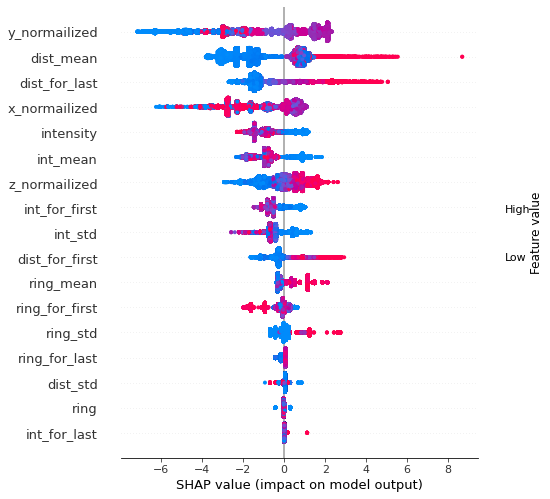

In [74]:
shap.summary_plot(shap_values, X_test[:100000]) 

Мы можем сделать следкющие выводы:
   * Чем больше среднее расстоние от точки до ее соседей, тем с большой вероятностью классификатор отнесет эту точку к снежинке.
   * Чем больше расстояние от точки до ее дальенего соседа, тем с большой вероятностью классификатор отнесет эту точку к снежинке.
   * Чем больше расстояние от точки до ее ближнего соседа, тем с большой вероятностью классификатор отнесет эту точку к снежинке.
   * Чем выше находиться точка (большая координата z), тем с большой вероятностью классификатор отнесет эту точку к снежинке.
   * Чем выше находиться луч, тем с большой вероятностью классификатор отнесет эту точку к снежинке.

Сейчас попробуем провести ablation study и обчуть модельку только на топовых фичах

In [97]:
X_train = df_train[["y_normailized", 
                    "dist_mean",
                    "dist_for_first",
                   "x_normailized",
                   "intensity",
                   "int_mean",
                   "z_normailized"]]
y_train = df_train[["label"]]

In [98]:
model.fit(X_train, y_train)

0:	learn: 0.2045917	total: 591ms	remaining: 29s
1:	learn: 0.1174592	total: 886ms	remaining: 21.3s
2:	learn: 0.0848481	total: 1.15s	remaining: 18s
3:	learn: 0.0721681	total: 1.4s	remaining: 16.1s
4:	learn: 0.0649322	total: 1.63s	remaining: 14.7s
5:	learn: 0.0578555	total: 1.85s	remaining: 13.5s
6:	learn: 0.0567855	total: 2.06s	remaining: 12.7s
7:	learn: 0.0548175	total: 2.28s	remaining: 12s
8:	learn: 0.0532538	total: 2.51s	remaining: 11.4s
9:	learn: 0.0517359	total: 2.73s	remaining: 10.9s
10:	learn: 0.0502047	total: 3s	remaining: 10.6s
11:	learn: 0.0490549	total: 3.27s	remaining: 10.4s
12:	learn: 0.0475881	total: 3.56s	remaining: 10.1s
13:	learn: 0.0471175	total: 3.9s	remaining: 10s
14:	learn: 0.0464475	total: 4.19s	remaining: 9.79s
15:	learn: 0.0455977	total: 4.42s	remaining: 9.4s
16:	learn: 0.0441759	total: 4.66s	remaining: 9.04s
17:	learn: 0.0435855	total: 4.91s	remaining: 8.72s
18:	learn: 0.0430704	total: 5.12s	remaining: 8.36s
19:	learn: 0.0425024	total: 5.33s	remaining: 8s
20:	lea

In [99]:
X_test = df_test[["y_normailized", 
                  "dist_mean",
                  "dist_for_first",
                  "x_normailized",
                  "intensity",
                   "int_mean",
                   "z_normailized"]]
y_test = df_test[["label"]]

In [100]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.9992503183924655

Как видим, качество не падает, а значит финальная модель будет только включать в себя именно эти фичи

### Посчитаем среднюю скорость работы алгоритма на 3000 точках

In [105]:
X_3000 = X_test[0:3000]
X_3000 = X_3000[["y_normailized", 
                  "dist_mean",
                  "dist_for_first",
                  "x_normailized",
                  "intensity",
                   "int_mean",
                   "z_normailized"]]

import time
from tqdm import tqdm
speed_time = []

for i in tqdm(range(1000)):
    start_time = time.time()
    rez = model.predict_proba(X_3000)
    end_time = time.time()
    speed_time.append(end_time - start_time)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1317.20it/s]


In [116]:
sum(speed_time)/1000 # средняя скорость работы catboost

0.0007500064373016358